# 타이타닉 호 데이터 분석

## 데이터 생성

* 앞서 다운받았던 dataset4를 이용한다.

## 요인별 생존 여부 관계

### 1. 성별

* 먼저 타이타닉 데이터의 구조를 파악하기 위해 10개의 데이터만 출력하여 구조를 살펴본다.

In [ ]:
# 10개의 데이터만 출력하여 데이터 확인
SELECT * FROM dataset4 LIMIT 10;

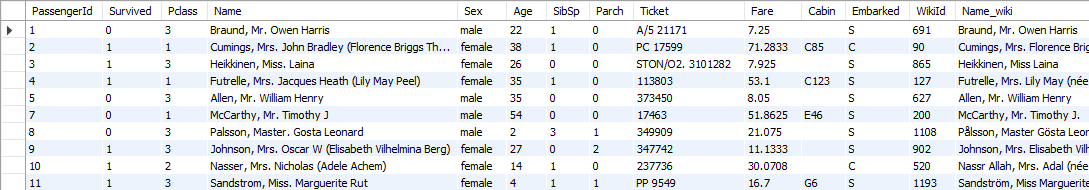

* 데이터를 보면 PassengerId라는 컬럼을 볼 수 있는데, 이 컬럼을 카운트하면 승객 수를 집계할 수 있다.
* PassengerId에 중복이 존재하는지 확인해본다.

In [ ]:
# PassengerId에 중복이 존재하는지 확인
SELECT COUNT(PassengerId) N_Passengers,
COUNT(DISTINCT PassengerId) N_D_Passengers
FROM dataset4;

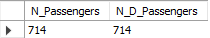

* PassengerId에 중복이 없음을 확인했으므로 성별에 따른 승객 수와 생존자 수를 구해본다.

In [ ]:
# 성별에 따른 승객 수와 생존자 수
SELECT Sex, COUNT(PassengerId) N_Passengers, SUM(Survived) N_Survived
FROM dataset4
GROUP BY 1;

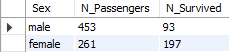

* 결과를 보면 여성 생존자 수가 남성보다 높다는 것을 알 수 있다. 다음으로 성별 탑승객 수와 생존자 수의 비중을 계산해 본다.

In [ ]:
# 성별 탑승객 수와 생존자 수의 비중
SELECT Sex, COUNT(PassengerId) N_Passengers, SUM(Survived) N_Survived,
SUM(Survived)/COUNT(PassengerId) Survived_Ratio
FROM dataset4
GROUP BY 1;

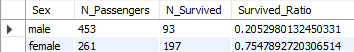

* 남성이 여성보다 타이타닉 호에 더 많이 탑승했고, 생존율은 여성이 남성보다 약 55% 높았다.

### 2. 연령, 성별

* 10세 단위로 연령을 나누어 본다.

In [ ]:
# 10세 단위로 연령을 나누어 확인
SELECT FLOOR(Age/10)*10 Ageband, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1;

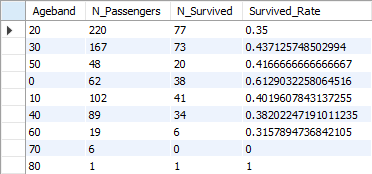

* 오름차순하여 결과를 보기 좋게 정리한다.

In [ ]:
# 오름차순하여 결과 정리
SELECT FLOOR(Age/10)*10 Ageband, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1
ORDER BY 1;

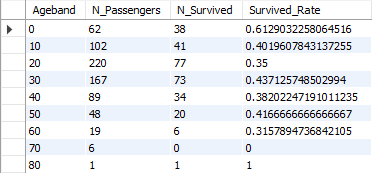

* 결과를 보면 20대의 탑승객 수가 가장 많았고, 70대를 제외하면 60대의 생존율이 가장 낮았다.
* 생존율이 가장 높았던 그룹은 0~9세 아동으로 나타난다.
* 연령에 성별을 추가해 좀 더 세부적으로 생존율을 확인해본다.

In [ ]:
# 연령에 성별을 추가해 생존율 확인
SELECT FLOOR(Age/10)*10 Ageband, Sex, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1, 2
ORDER BY 2, 1;

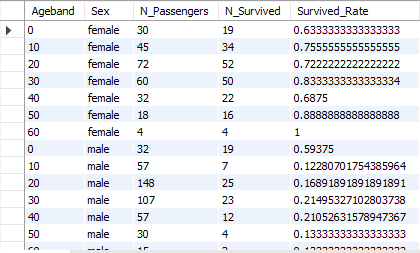

* 결과를 보면 50대 여성의 생존율이 가장 높게 나타나고, 10대 남성의 생존율이 가장 낮게 나타난다
* 남성, 여성의 동일 연령대별 생존의 차이를 구하려면, 위 테이블을 2개로 나눈 뒤 연령대로 2개 테이블을 조인하면 구하려는 값을 계산할 수 있다.
* 위 결과를 2개 테이블(남성, 여성)로 구분해 본다.

In [ ]:
# 위 결과를 2개 테이블(남성, 여성)로 구분
# 남성
SELECT FLOOR(Age/10)*10 Ageband, Sex, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1, 2
HAVING Sex = 'male';

# 여성
SELECT FLOOR(Age/10)*10 Ageband, Sex, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1, 2
HAVING Sex = 'female';

* 남성

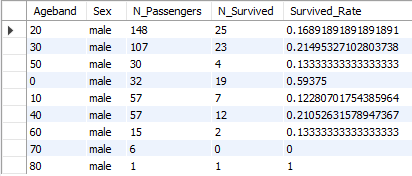

* 여성

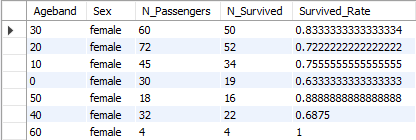

* 2개 테이블을 조인하면, 성별 동일 연령대별 생존율 차이를 비교해 볼 수 있다.
* 2개 테이블을 서브쿼리로 생성하고 조인해본다.

In [ ]:
# 2개 테이블을 서브쿼리로 생성하고 조인
SELECT A.Ageband, A.Survived_Rate Male_Survived_Rate,
B.Survived_Rate Female_Survived_Rate,
B.Survived_Rate - A.Survived_Rate Survived_Rate_Diff
FROM
(SELECT FLOOR(Age/10)*10 Ageband, Sex, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1, 2
HAVING Sex = 'male') A
LEFT JOIN
(SELECT FLOOR(Age/10)*10 Ageband, Sex, COUNT(PassengerId) N_Passengers,
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY 1, 2
HAVING Sex = 'female') B
ON A.Ageband = B.Ageband
ORDER BY A.Ageband;

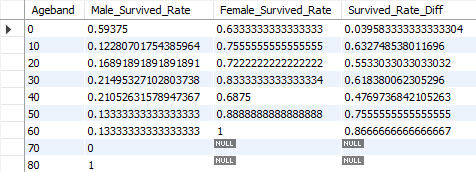

* Survived_Rate_Diff는 연령별 여성의 생존율 - 남성의 생존율을 나타낸다.
* 전반적으로 여성의 경우 모든 연령대에서 60% 이상의 생존율을 보인다. 반대로 남성의 경우 10, 20대의 생존율이 50, 60대와 비슷하게 나타낸다.

* 성별과 연령에 따라 생존율이 다른 이유는 스페인 웁살라 대학 경제학 교수 미카엘 엘린더와 오스카 에릭손의 연구 인터뷰를 통해 추측해볼 수 있다.
* 1852년부터 2011년까지 세계30국에서 일어난 해상 사고를 분석한 결과에서 사고 시 가장 생존율이 높은 사람들은 다름 아닌 선장과 승무원으로 드러났고, '여성과 어린이 먼저'라는 기사도 대신 '모든 사람이 자신만 생각'하는 패턴을 보인다고 주장했다.
* 즉, 연구에 따르면 가장 생존율이 높은 집단은 선장과 승무원이며, 사고가 발생하면, 인간은 자신의 안전을 가장 우선시한다는 것이다.
* 타이타닉 사고에서는 왜 특이하게 성별, 연령에 따라 생존율에 차이가 있었는지는 당시 타이타닉호 선장의 인터뷰를 통해 예측해볼 수 있다.
* 선장이 구조 활동에서 어린이, 여자, 남자 순으로 탈출시켜 연령과 성별에 따라 생존율에 차이가 존재했던 것으로 보인다.

* 만약 이런 사실이 알려지지 않았다면, 타이타닉 구조 활동의 결과는 영국식 기사도의 결과라는 잘못된 주장의 근거가 될 수도 있었을 것이다.
* 이처럼 데이터는 어떻게 해석하는냐에 따라 잘못된 주장의 근거로 사용될 수도 있다.
* 따라서 데이터를 분석할 때는 한 가지 관점이 아닌 다양한 관점과 가능성을 열어 두고 해석하는 것이 중요하다.

### 3. Pclass(객실 등급)

* 생존율과 객실 등급 사이의 관계를 확인하고자 한다. 먼저 객실 등급에는 어떤 값이 있는지 살펴본다.

In [ ]:
# 객실 등급의 값 확인
SELECT DISTINCT Pclass
FROM dataset4;

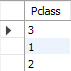

* 타이타닉호의 객실 등급은 1등실, 2등실, 3등실로 나뉘어 있다.

* 객실 등급별로 승객 수와 생존자 수, 생존율을 계산해 본다.

In [ ]:
# 객실 등급별로 승객 수와 생존자 수, 생존율 계산
SELECT Pclass, COUNT(PassengerId) N_Passengers, 
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY Pclass
ORDER BY 1;

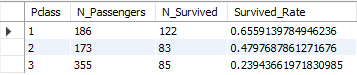

* 실제 기록과 추출한 결과를 보면, 탑승객 수에 차이가 존재하는데 그 당시에는 탑승이 전산으로 처리되지 않았을 것이므로, 일부 승객의 정보가 유실될 가능성이 있다.
* 생존율은 1등석, 2등석, 3등석 순으로 높게 나타난다. 선장의 구조 정책에 따라 어린이-여성-남성 순서로 구조되었다면, 객실 등급의 생존율에 이렇게 차이가 있을 수 없다.
* 객실 위치를 보면, 이 결과를 어느정도 이해할 수 있다. 상위 등급의 객실일수록 배의 상층에 위치한다. 듯, 사고가 발생했을 때 탈출하기에 더 용이했을 것이다.

* 타이타닉 구조도

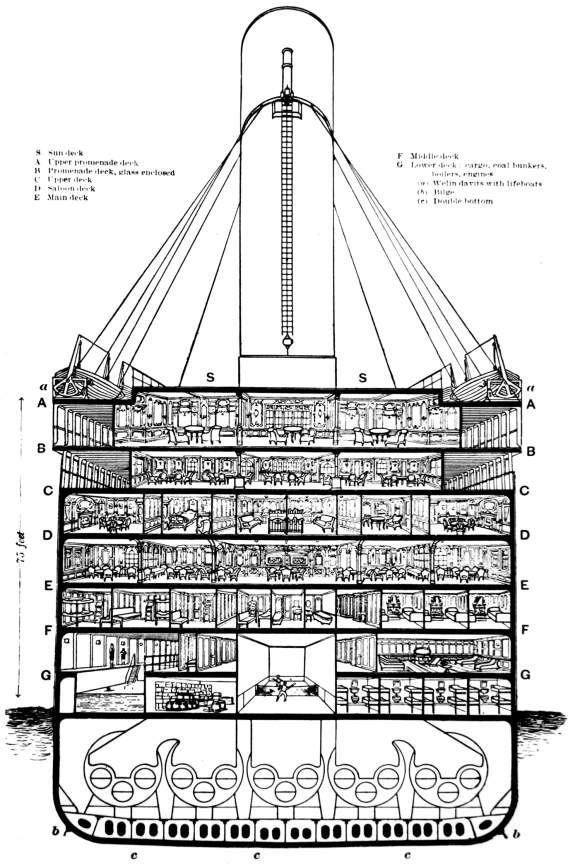

* 추가로 객실 등급과 연령, 성별을 조합해 생존율을 알아본다.

In [ ]:
# 객실 등급과 성별을 조합하여 생존율 확인
SELECT Pclass, Sex, COUNT(PassengerId) N_Passengers, 
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY Pclass, Sex
ORDER BY 2, 1;

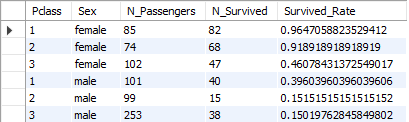

* 3등석 여성의 생존율이 1등석 남성의 생존율보다 높은 것은 실제로 객실 등급보다 연령, 성별이 구조에서 우선적으로 고려된 것으로 보인다.
* 추가로 연령도 함께 고려하여 생존율을 분석해본다.

In [ ]:
# 객실 등급과 연령, 성별을 조합하여 생존율 확인
SELECT Pclass, Sex, FLOOR(Age/10)*10 Ageband, COUNT(PassengerId) N_Passengers, 
SUM(Survived) N_Survived, SUM(Survived)/COUNT(PassengerId) Survived_Rate
FROM dataset4
GROUP BY Pclass, Sex, FLOOR(Age/10)*10
ORDER BY 2, 1;

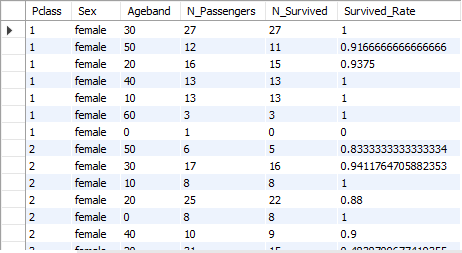

* 유아일수록 생존율이 높았고, 모든 객실 등급에서 여성의 생존율이 더 높게 나타났다.

## EMBARKED

* 승선 항구에 따른 승선자 수와 생존율의 관계를 살펴본다.

### 1. 승선 항구별 승객 수

In [ ]:
# 승선 항구별 승객 수
SELECT Embarked, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1
ORDER BY 1;

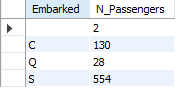

### 2. 승선 항구별, 성별 승객 수

In [ ]:
# 승선 항구별, 성별 승객 수
SELECT Embarked, Sex, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1, 2
ORDER BY 1, 2;

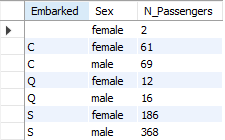

### 3. 승선 항구별, 성별 승객 비중(%)

* 여성 승객, 남성 승객의 비중이 얼마나 되는지 계산해본다.
* 항구별 전체 승객 수를 계산하고, 남성, 여성 승객 수를 전체 승객 수로 나누면, 남성, 여성의 승객 비중을 계산할 수 있다.

#### a. 승선 항구별 전체 승객 수

In [ ]:
# 승선 항구별 전체 승객 수
SELECT Embarked, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1;

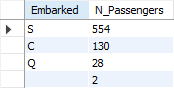

#### b. 승선 항구별, 성별 승객 수

In [ ]:
# 승선 항구별, 성별 승객 수
SELECT Embarked, Sex, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1, 2;

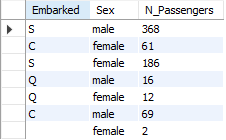

#### c. 테이블 결합

In [ ]:
# 테이블 결합
SELECT A.Embarked, A.Sex, A.N_Passengers,
B.N_Passengers N_Passengers_Tot, A.N_Passengers/B.N_Passengers Passengers_Rat
FROM
(SELECT Embarked, Sex, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1, 2) A
LEFT JOIN
(SELECT Embarked, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1) B
ON A.Embarked = B.Embarked;

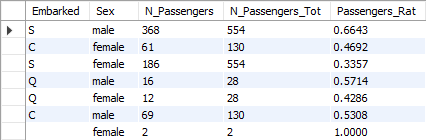

## 탑승객 분석

### 1. 출발지, 도착지별 승객 수

* 출발지와 목적지별 승객 수를 구해본다.

In [ ]:
# 출발지와 목적지별 승객 수
SELECT Boarded, Destination, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1, 2
ORDER BY 3 DESC;

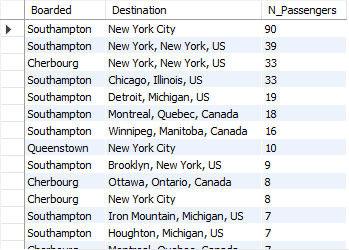

* 타이타닉호는 지도 우측 상단에 위치한 영국의 사우스햄튼에서 출발해 뉴욕으로 향했다고 한다.
* 사우스햄튼에서 탑승해 뉴욕으로 향하는 승객이 가장 많았고, 다음으로는 찰부르크에서 출발해 뉴욕으로 향하는 승객이 많았다.
* 상위 5개 경로를 선택한 승객들의 이름을 추출하기 위해선 먼저 탑승객 수로 순위를 매겨준다.
* 탑승객 수가 가장 많은 경로가 1이 되어야 하므로 내림차순으로 정렬한다.

In [ ]:
# 탑승객 수로 순위 설정
SELECT *,
ROW_NUMBER() OVER(ORDER BY N_Passengers DESC) RNK
FROM
(SELECT Boarded, Destination, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1, 2) BASE;

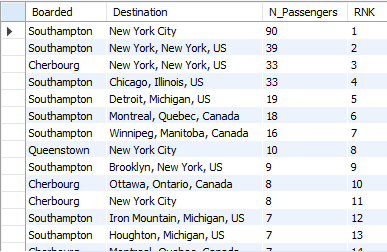

* 다음으로 상위 5개 경로를 선택한다. 이후 해당 경로를 테이블로 생성한다.

In [ ]:
# 상위 5개 경로를 선택 이후 해당 경로를 테이블로 생성
CREATE TEMPORARY TABLE route AS
SELECT Boarded, Destination
FROM
(SELECT *,
ROW_NUMBER() OVER(ORDER BY N_Passengers DESC) RNK
FROM
(SELECT Boarded, Destination, COUNT(PassengerId) N_Passengers
FROM dataset4
GROUP BY 1, 2) BASE) BASE
WHERE RNK BETWEEN 1 AND 5;

# 테이블 확인
SELECT * FROM route;

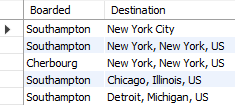

* 마지막으로 생성한 경로에 해당하는 승객들의 이름을 추출한다.

In [ ]:
# 생성한 경로에 해당하는 승객들의 이름 추출
SELECT Name_wiki, A.Boarded, A.Destination
FROM dataset4 A
INNER JOIN route B
ON A.Boarded = B.Boarded AND A.Destination = B.Destination;

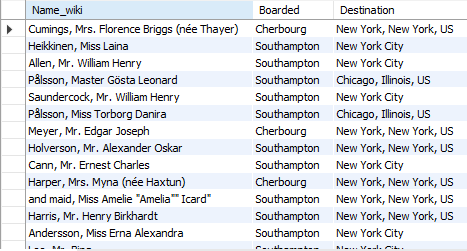

### 2. Hometown별 탑승객 수 및 생존율

* Hometown별 탑승객 수와 탑승객 대비 생존율을 구해본다.

In [ ]:
# Hometown별 탑승객 수와 탑승객 대비 생존율
SELECT Hometown, SUM(1) N_Passengers, SUM(Survived)/SUM(1) Survived_Ratio
FROM dataset4
GROUP BY 1;

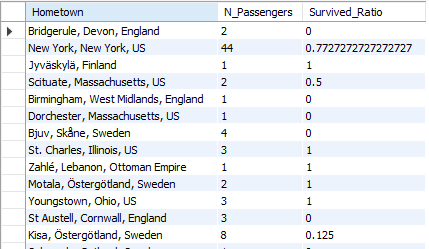

* 탑승객 수가 10명 이상이면서 생존율이 0.5 이상인 Hometown을 출력하려 한다.

In [ ]:
# 탑승객 수가 10명 이상이면서 생존율이 0.5 이상인 Hometown 출력
SELECT Hometown, SUM(1) N_Passengers, SUM(Survived)/SUM(1) Survived_Ratio
FROM dataset4
GROUP BY 1
HAVING SUM(Survived)/SUM(1) >= 0.5 AND SUM(1) >= 10;

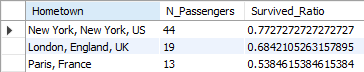

* 상관분석, 및 데이터분석 시각화는 기존에 파이썬으로 실습한 파일이 존재하므로 그 파일을 참고하여 복습하고자 한다.